# Exploration et nettoyage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# chargement des fichiers
power_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [3]:
# Voir une description des données 
print(power_data.describe())
print(weather_data.describe())

        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06
        PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415  

In [4]:
#### Voir s'il existe des données manquantes

print(power_data.isnull())
print(weather_data.isnull())

       DATE_TIME  PLANT_ID  SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0          False     False       False     False     False        False   
1          False     False       False     False     False        False   
2          False     False       False     False     False        False   
3          False     False       False     False     False        False   
4          False     False       False     False     False        False   
...          ...       ...         ...       ...       ...          ...   
68773      False     False       False     False     False        False   
68774      False     False       False     False     False        False   
68775      False     False       False     False     False        False   
68776      False     False       False     False     False        False   
68777      False     False       False     False     False        False   

       TOTAL_YIELD  
0            False  
1            False  
2            False  
3            Fa

In [5]:
# Supprimer les doublons s'il existe

power_data = power_data.drop_duplicates()
weather_data = weather_data.drop_duplicates()

In [6]:
power_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [7]:
# Pour le premier dataset (format jour-mois-année)
power_data['DATE_TIME'] = pd.to_datetime(power_data['DATE_TIME'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Pour le deuxième dataset (format année-mois-jour)
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')


In [8]:
weather_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [9]:
weather_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [10]:
# Joindre les 2 dataset
solar_production = pd.merge(power_data.drop(columns=["PLANT_ID"]),weather_data.drop(columns=["PLANT_ID","SOURCE_KEY"]), on='DATE_TIME')

In [11]:
solar_production

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


In [12]:
# Separer la date et heure 
solar_production['DATE'] = solar_production['DATE_TIME'].dt.date
solar_production['TIME'] = solar_production['DATE_TIME'].dt.time

# Separer l'heure
solar_production['HOURS'] = solar_production['DATE_TIME'].dt.hour
solar_production['MINUTE'] = solar_production['DATE_TIME'].dt.minute

In [13]:
solar_production

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,HOURS,MINUTE
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,45
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,45
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,45
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,45


In [14]:
# Ajouter une un nombre et un nom pour chaque onduleur
sensor_keys = solar_production['SOURCE_KEY'].unique()
sensor_numbers = dict(zip(sensor_keys, range(1, len(sensor_keys) + 1)))
solar_production['INVERTER_KEY'] = solar_production['SOURCE_KEY'].map(sensor_numbers)

#Ajouter la colonne INVERTER_NAME avec le format "INVERTER_X"
solar_production['INVERTER_NAME'] = solar_production['INVERTER_KEY'].apply(lambda x: f"INVERTER_{x}")

In [15]:
solar_production

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,HOURS,MINUTE,INVERTER_KEY,INVERTER_NAME
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,0,1,INVERTER_1
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,0,2,INVERTER_2
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,0,3,INVERTER_3
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,0,4,INVERTER_4
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,0,5,INVERTER_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,45,17,INVERTER_17
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,45,18,INVERTER_18
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,45,19,INVERTER_19
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,45,20,INVERTER_20


# Analyse exploratoire des données

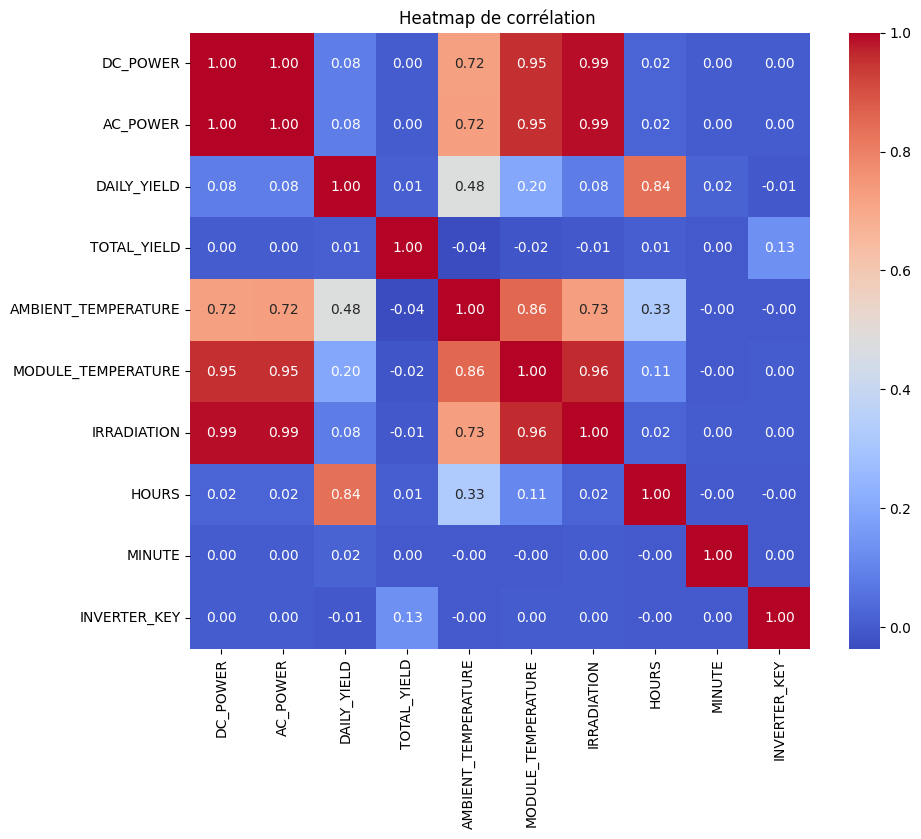

In [16]:
# Voir les corrélation existant entre les differents variables
numeric_data = solar_production.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Creation du heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap de corrélation ")
plt.show()

# Interpretation du Heatmap

#### Corrélation parfaite entre POWER_DC et POWER_AC (1.00) :
Cela indique que le système de conversion est extrêmement efficace, avec très peu de pertes entre la puissance en courant continu (DC) et la puissance en courant alternatif (AC).

#### Corrélation très forte entre l'irradiation et la production (POWER_AC et POWER_DC) (0.99) :
Cette corrélation peut être expliquée par le principe fondamental des systèmes photovoltaïques, où la production d'énergie est directement liée à l'énergie solaire captée (irradiation). Une irradiation plus élevée entraîne une production plus importante.

#### Corrélation significative entre l'heure de la journée et la production journalière (DAILY_YIELD) (0.84) :
Cela reflète une relation entre le moment de la journée et la quantité totale d'énergie produite. En général, les heures proches du pic solaire (milieu de journée) contribuent davantage à la production journalière.

#### Corrélation forte entre la température ambiante et la température du module (0.86) :
Cela signifie que l'augmentation de la température ambiante affecte directement la température des modules photovoltaïques. Ces deux températures sont fortement liées.

#### Corrélation entre l'irradiation et les températures :
Température ambiante (0.73) : Une irradiation plus forte entraîne une hausse de la température ambiante.
Température du module (0.96) : La relation est encore plus forte ici, car une irradiation élevée chauffe directement les modules photovoltaïques.

#### Corrélation entre la température du module et la production (POWER_AC et POWER_DC) (0.95) :
Cela suggère que la température du module influence significativement la production d'énergie. Bien que des modules trop chauds puissent entraîner des pertes d'efficacité, ils restent liés à des niveaux élevés de production en raison d'une forte irradiation.

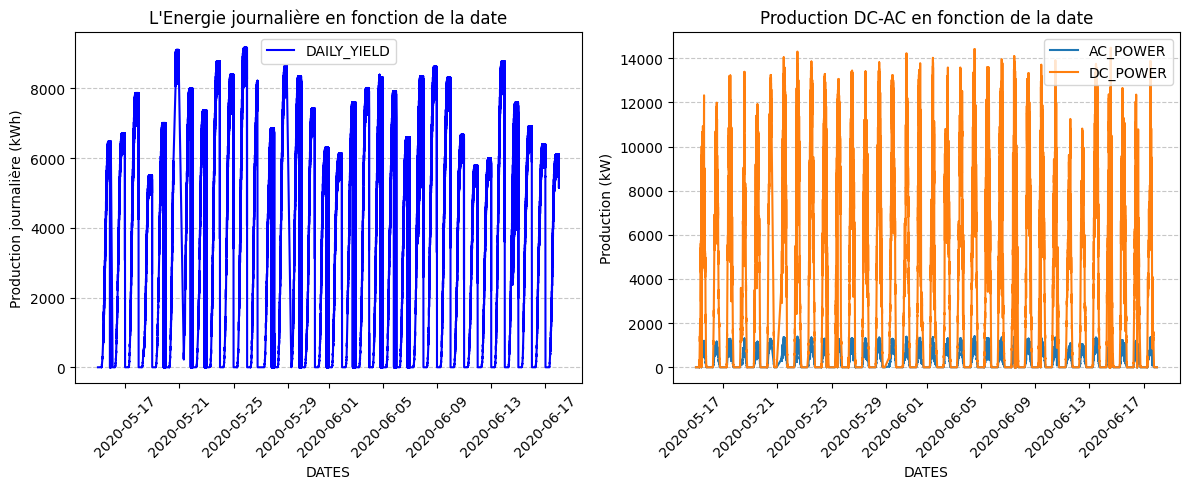

In [17]:
#Créer deux graphiques côte à côte
plt.figure(figsize=(12, 5))  # Largeur et hauteur de la figure

# Premier graphique : DAILY_YIELD en fonction de DATE_TIME
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er graphique
plt.plot(solar_production['DATE_TIME'], solar_production['DAILY_YIELD'], label='DAILY_YIELD', color='blue')
plt.title('L\'Energie journalière en fonction de la date')
plt.xlabel('DATES')
plt.ylabel('Production journalière (kWh)')
plt.xticks(rotation=45)  # Incliner les dates pour lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille pour lecture
plt.legend()

# Préparer les données pour le deuxième graphique
power_data = solar_production.set_index('DATE_TIME')[['AC_POWER', 'DC_POWER']]

# Deuxième graphique : AC_POWER et DC_POWER en fonction de DATE_TIME
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e graphique
ax = plt.gca()  # Obtenir l'axe courant pour la sous-figure
power_data.plot(ax=ax)  # Tracer sur l'axe spécifié
plt.title('Production DC-AC en fonction de la date')
plt.xlabel('DATES')
plt.ylabel('Production (kW)')
plt.xticks(rotation=45)  # Incliner les dates
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille

plt.tight_layout()  # Ajuster l'espacement
plt.show()

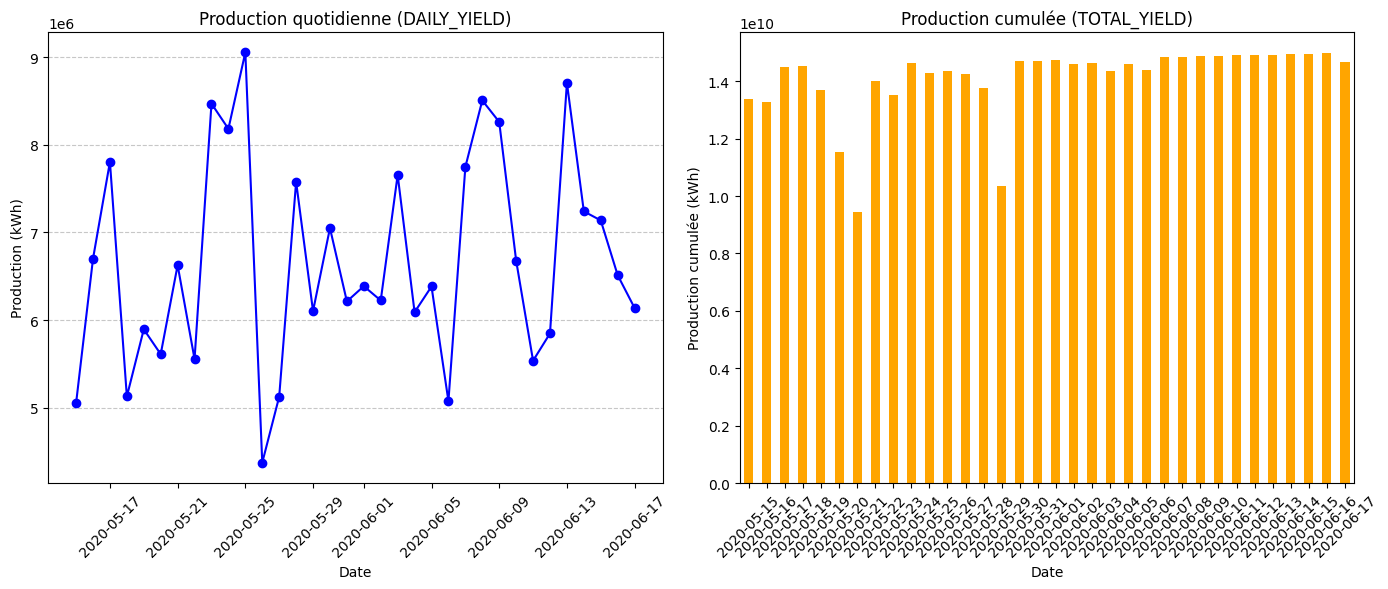

In [18]:
solar_data = solar_production.groupby('DATE').sum(numeric_only=True)
# Créer deux graphiques côte à côte
plt.figure(figsize=(14, 6))  # Largeur et hauteur de la figure

# Premier graphique : DAILY_YIELD en ligne
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er graphique
solar_data['DAILY_YIELD'].plot(kind='line', marker='o', color='blue')
plt.title('Production quotidienne (DAILY_YIELD)')
plt.xlabel('Date')
plt.ylabel('Production (kWh)')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille pour faciliter la lecture
plt.xticks(rotation=45)  # Incliner les dates pour éviter les chevauchements

# Deuxième graphique : TOTAL_YIELD en barres
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e graphique
solar_data['TOTAL_YIELD'].plot(kind='bar', color='orange')
plt.title('Production cumulée (TOTAL_YIELD)')
plt.xlabel('Date')
plt.ylabel('Production cumulée (kWh)')
plt.xticks(rotation=45)  # Incliner les dates pour une meilleure lisibilité

# Ajuster l'espacement pour éviter les chevauchements
plt.tight_layout()
plt.show()

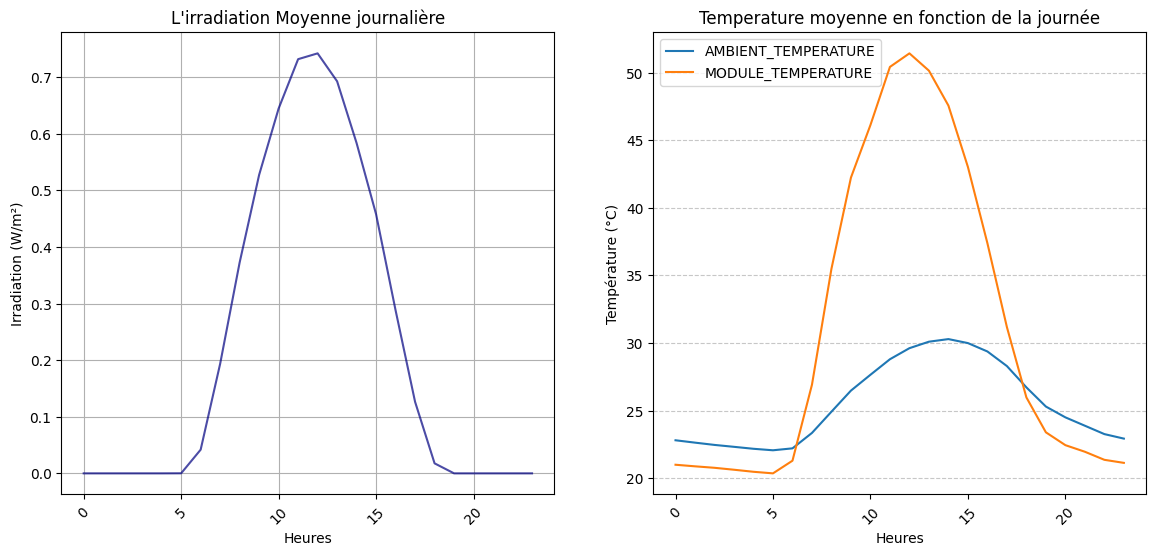

In [26]:
solar_irr = solar_production.groupby('HOURS')[['IRRADIATION','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].mean()

# Créer deux graphiques côte à côte
plt.figure(figsize=(14, 6))  # Largeur et hauteur de la figure

# Premier graphique : DAILY_YIELD en ligne
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er graphique
solar_irr['IRRADIATION'].plot(color='navy', alpha=0.7)
plt.title('L\'irradiation Moyenne journalière')
plt.xlabel('Heures')
plt.ylabel('Irradiation (W/m²)')
plt.xticks(rotation=45)  # Incliner les dates pour lisibilité
plt.grid()

# Deuxième graphique : TOTAL_YIELD en barres
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e graphique
solar_irr['AMBIENT_TEMPERATURE'].plot(label='AMBIENT_TEMPERATURE')
solar_irr['MODULE_TEMPERATURE'].plot(label='MODULE_TEMPERATURE')
plt.title('Temperature moyenne en fonction de la journée')
plt.xlabel('Heures')
plt.ylabel('Température (°C)')
plt.xticks(rotation=45)  # Incliner les dates
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

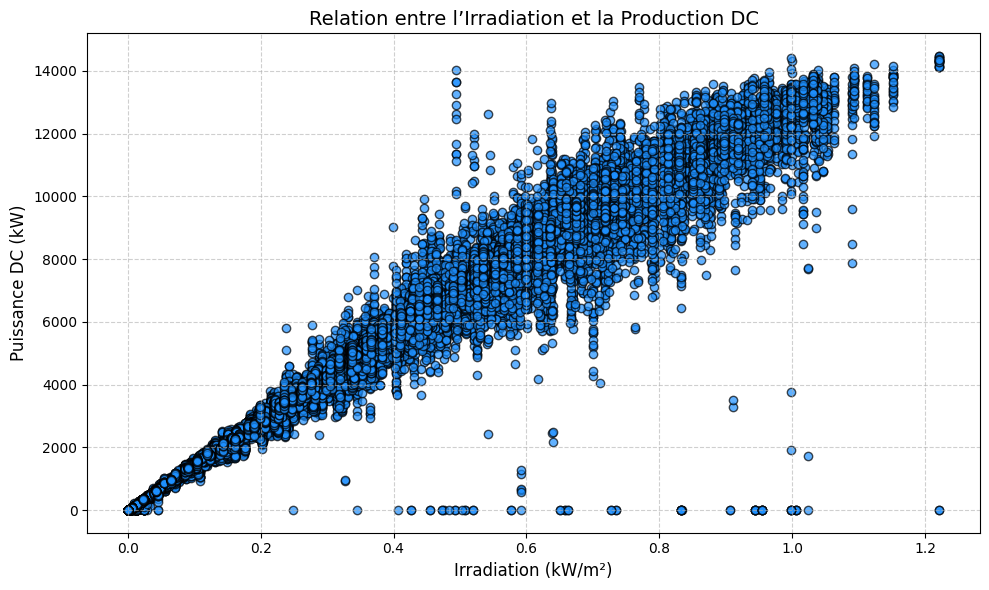

In [27]:
# Scatter plot entre l'irradiation et la puissance DC
plt.figure(figsize=(10, 6))
plt.scatter(solar_production['IRRADIATION'], solar_production['DC_POWER'], alpha=0.7, color='dodgerblue', edgecolors='k')

# Ajouter des labels et un titre
plt.title('Relation entre l’Irradiation et la Production DC', fontsize=14)
plt.xlabel('Irradiation (kW/m²)', fontsize=12)
plt.ylabel('Puissance DC (kW)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Prédiction de la production DC

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Séparation des données en target Y et features X

In [56]:
y = solar_production['DC_POWER']
X= solar_production[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]

### Prediction sans normalisation des données

In [57]:
#Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train,y_test = train_test_split(X, y , test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction du modèle
y_pred = model.predict(X_test)

#Evaluation du modele
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Évaluation du modèle :")
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Coefficient de détermination (R²) : {r2:.2f}")

Évaluation du modèle :
Erreur quadratique moyenne (MSE) : 319864.06
Coefficient de détermination (R²) : 0.98
